In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df=sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# k means algorithm requires scaling!!!!!

In [6]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


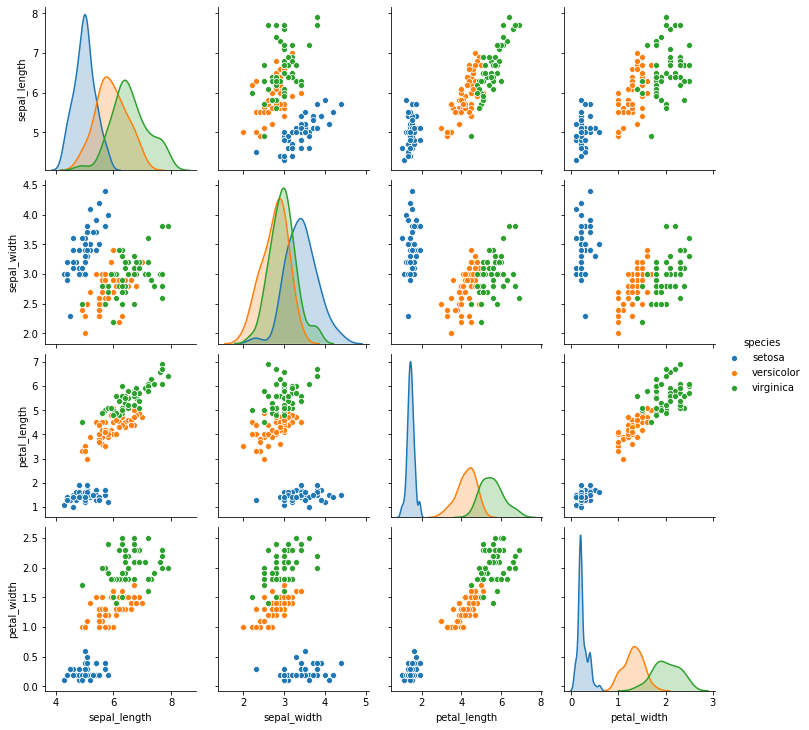

In [8]:
sns.pairplot(df, hue="species")
plt.show()

In [10]:
X=df.drop("species", axis=1)

In [11]:
X.shape

(150, 4)

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


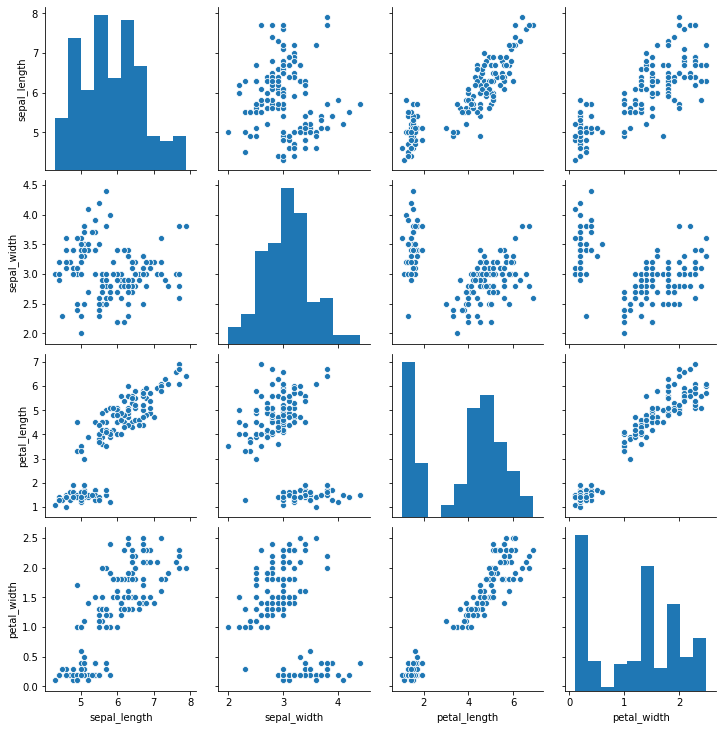

In [13]:
sns.pairplot(X)
plt.show()

**hopkins test**

In [ ]:
#pip install pyclustertend

In [14]:
from pyclustertend import hopkins

In [15]:
X.shape

(150, 4)

In [16]:
hopkins(X, X.shape[0])

0.16303716207552713

**Elbow Method**

In [17]:
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

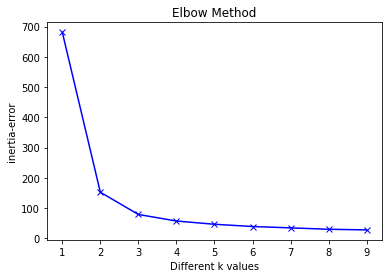

In [19]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

In [21]:
model=KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(n_clusters=3)

In [22]:
model.inertia_

78.851441426146

In [23]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [24]:
clusters = model.labels_

In [ ]:
# Normally, these labels are inserted to the X.

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
df["predicted_clusters"]=clusters

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [29]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
23,5.1,3.3,1.7,0.5,setosa,0
117,7.7,3.8,6.7,2.2,virginica,2
61,5.9,3.0,4.2,1.5,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
125,7.2,3.2,6.0,1.8,virginica,2


In [30]:
ct = pd.crosstab(df.predicted_clusters, df.species)

In [33]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,50,0,0
1,0,48,14
2,0,2,36


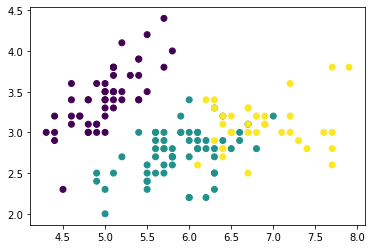

In [34]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, cmap="viridis")

In [36]:
centers=model.cluster_centers_

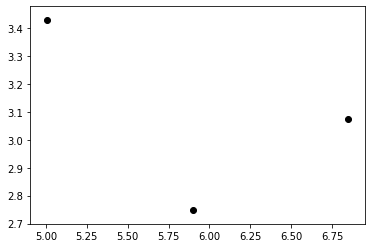

In [37]:
plt.scatter(centers[:,0], centers[:,1], c="black")

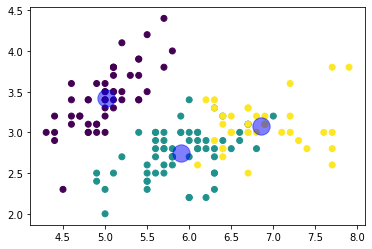

In [42]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="blue", s=300, alpha=0.5)